### Q1. Explain the difference between linear regression and logistic regression models. Provide an example of a scenario where logistic regression would be more appropriate.


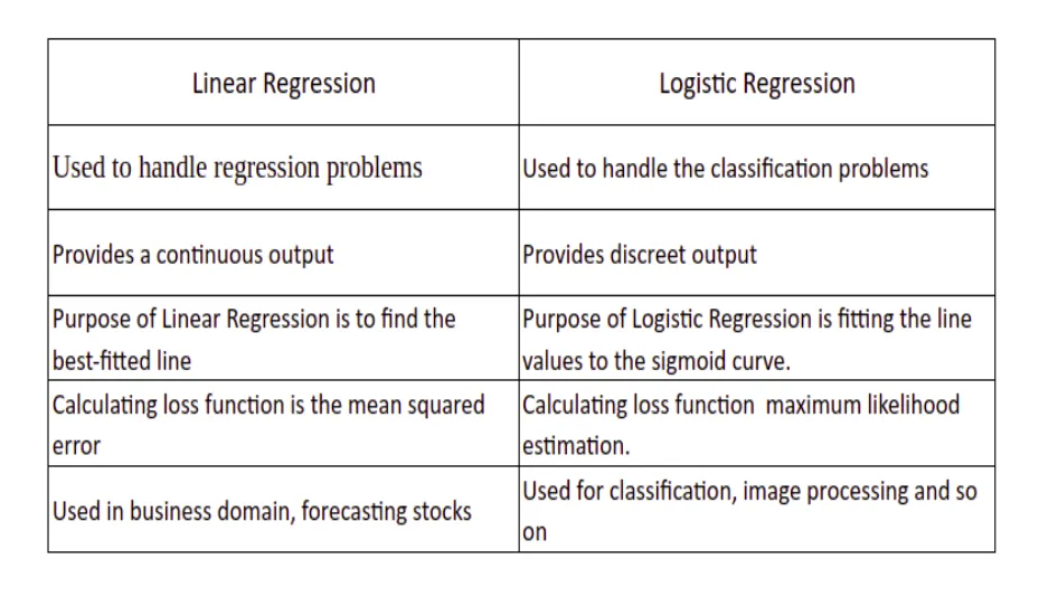


#### Email Spam Detection
Imagine you are working for an email service provider, and your task is to develop a spam filter that can classify incoming emails as either "spam" or "not spam" (ham). The goal is to automatically move spam emails to a separate spam folder, ensuring that users only see legitimate emails in their main inbox.

In this example,

Dependent Variable (Target): The dependent variable is the classification of an email as either "spam" or "not spam." This is a binary categorical variable.

Independent Variables (Features): You have a set of features for each email that can be used to make the classification decision. These features could include the sender's email address, subject line, the presence of certain keywords, and more. These features can be numeric, categorical, or a combination of both.

#### Logistic regression would be a suitable choice for this scenario for several reasons:

Binary Classification: The problem involves binary classification, where you want to predict one of two possible outcomes (spam or not spam).

Interpretability: Logistic regression provides interpretable results, making it easy to understand the relationship between the independent variables (email features) and the likelihood of an email being spam.

Efficiency: Logistic regression is computationally efficient and can handle a large number of features and data points, making it well-suited for processing a high volume of incoming emails.

Probability Estimation: Logistic regression also provides probability estimates, which can be useful in ranking emails by their likelihood of being spam. This helps in deciding which emails to prioritize for user review.

### Q2. What is the cost function used in logistic regression, and how is it optimized?

In logistic regression, the cost function used is the logistic loss function (also known as binary cross-entropy loss). It measures how well the model's predicted probabilities align with the actual class labels. The cost function for logistic regression is defined as:

##### For a binary classification problem, where the output is either 0 or 1,

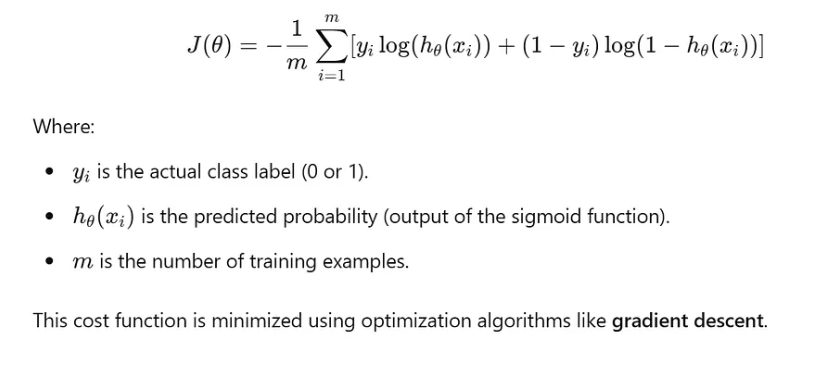

#### Optimizing the Cost Function:

To find the optimal parameters 
θ, we minimize the cost function. This is done using optimization algorithms, such as:

**Gradient Descent:** The most common optimization method. In each iteration, the parameters 
θ are updated in the direction of the negative gradient of the cost function. The update rule for gradient descent is:

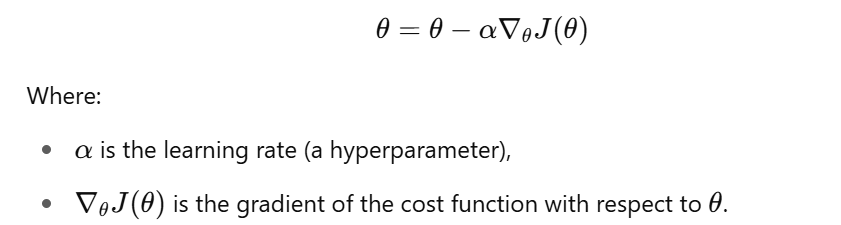

**Stochastic Gradient Descent (SGD):** This is a variant of gradient descent where the model is updated after each training example, instead of after processing the entire dataset.   

**Advanced Optimization Techniques:** Techniques like Mini-batch Gradient Descent, Adam, or RMSProp may also be used to improve convergence speed and stability.   

**The goal is to iteratively update θ to reduce the cost function, eventually converging to the optimal parameters that minimize the error between predicted and actual values.**  

### Q3. Explain the concept of regularization in logistic regression and how it helps prevent overfitting.

**Regularization** in logistic regression is a technique used to prevent overfitting, which occurs when a model learns the noise in the training data rather than the underlying pattern, leading to poor generalization to new, unseen data.

Overfitting typically happens when the model becomes too complex, with overly large weights that perfectly fit the training data. Regularization discourages the model from fitting too closely to the noise by adding a penalty to the cost function based on the size of the model’s parameters.

#### Types of Regularization:

There are two common types of regularization used in logistic regression:

**L2 Regularization (Ridge Regularization):** In L2 regularization, a penalty term proportional to the square of the magnitude of the coefficients (weights) is added to the cost function. The cost function becomes:

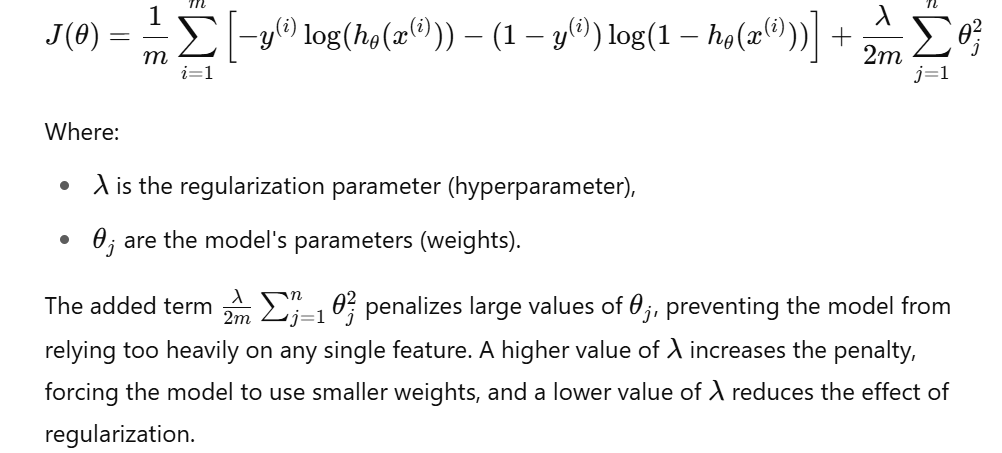

**L1 Regularization (Lasso Regularization):** L1 regularization adds a penalty term proportional to the absolute value of the coefficients. The cost function becomes:

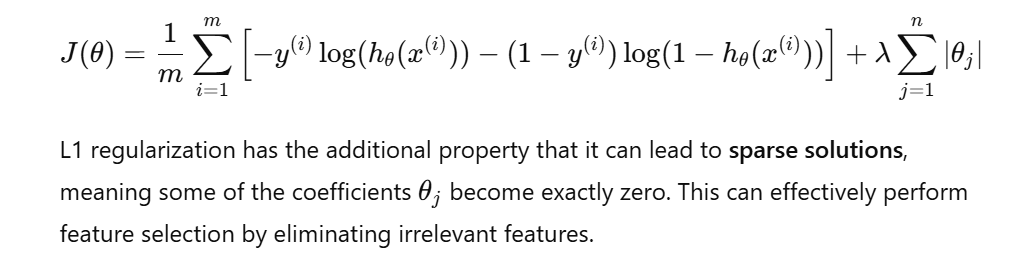

#### How Regularization Helps Prevent Overfitting:

1.Constraining Model Complexity: By adding a penalty to the cost function, regularization discourages the model from assigning excessively large values to any single feature's weight. This helps prevent the model from becoming too complex and overfitting to the training data.

2.Better Generalization: Regularized models are less likely to overfit the noise in the training set and are better able to generalize to new, unseen data, which leads to improved performance on test sets or real-world data.

3.Control Overfitting: The hyperparameter λ (regularization strength) controls the degree of regularization. If λ is set too high, the model may become too simple and underfit, whereas a small value of λ may not provide enough regularization and could still lead to overfitting.   

4.Choosing the Regularization Parameter:  
The optimal value of λ is typically chosen through cross-validation or using grid search techniques, which involve training the model on different subsets of the data and evaluating performance on unseen data.

In summary, regularization adds a penalty to the cost function that helps prevent overfitting by discouraging overly complex models, thereby encouraging better generalization and improved performance on unseen data.


### Q4. What is the ROC curve, and how is it used to evaluate the performance of the logistic regression model?

The **Receiver Operating Characteristic (ROC)** curve is a graphical representation used to evaluate the performance of a binary classification model, such as logistic regression. It illustrates the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR) at different threshold values.

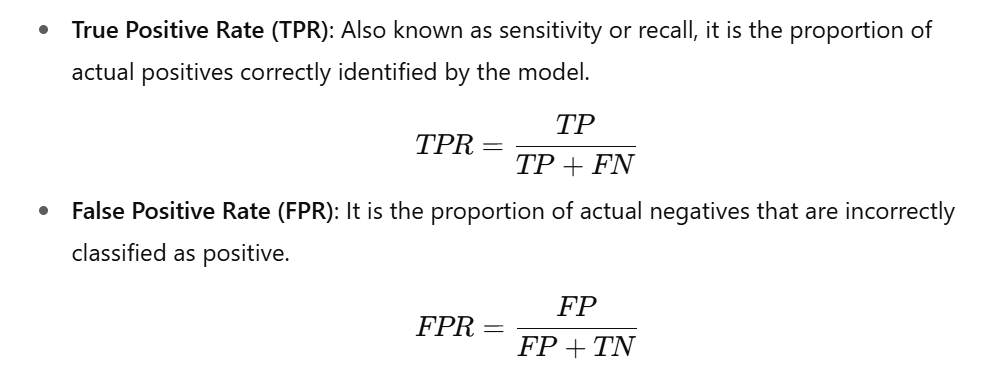

##### Where:

TP: True Positives

TN: True Negatives

FP: False Positives

FN: False Negatives


#### ROC Curve:
The ROC curve plots the TPR (sensitivity) on the y-axis and FPR (1 - specificity) on the x-axis. By varying the decision threshold for classification, we can generate different values for TPR and FPR, which are plotted to form the curve.  

#### Area Under the Curve (AUC):  
The AUC (Area Under the Curve) is a scalar value that summarizes the ROC curve. It gives a measure of the model's ability to distinguish between positive and negative classes:  

AUC = 1 indicates perfect classification.  
  
AUC = 0.5 indicates random classification.   

AUC < 0.5 suggests the model performs worse than random.  

Using ROC Curve to Evaluate Logistic Regression:   
In Python, you can use libraries like scikit-learn to plot and evaluate the ROC curve. Below is an example demonstrating how to compute and plot the ROC curve for a logistic regression model.  

#### Interpreting the ROC Curve:

Above the diagonal: The model is better than random (AUC > 0.5).

Below the diagonal: The model is worse than random (AUC < 0.5).

Closer to the top-left corner: The better the model, as it maximizes TPR and minimizes FPR.

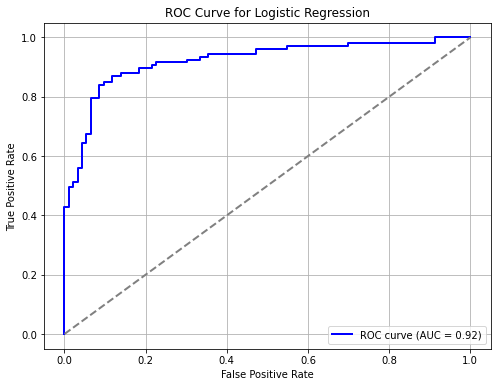

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc

# Step 1: Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Get the predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Step 5: Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Step 6: Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Step 7: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Q5. What are some common techniques for feature selection in logistic regression? How do these techniques help improve the model's performance?

**Feature selection** is a crucial step in building a logistic regression model, as it helps identify the most relevant and informative features while discarding irrelevant or redundant ones. Effective feature selection can improve the model's performance by reducing overfitting, enhancing interpretability, and potentially speeding up training. Here are some common techniques for feature selection in logistic regression:

**Univariate Feature Selection:**    
Univariate feature selection methods evaluate each feature independently in relation to the target variable. Common techniques include:
1.Chi-Square Test: Used for categorical target variables, it measures the independence between each feature and the target.   
2.F-Test (ANOVA): Useful for numerical features and categorical target variables, it assesses whether there is a significant difference in means between categories.   
3.Mutual Information: Measures the dependency between a feature and the target variable.  

**Feature Importance from Tree-Based Models:**  
Tree-based models like Random Forest or Gradient Boosting can provide feature importance scores. Features with higher importance scores are considered more relevant. This is especially useful when you want to identify important features in complex datasets.

**L1 Regularization (Lasso):**    
As mentioned earlier, L1 regularization encourages sparsity by driving some coefficient values to zero. Features corresponding to non-zero coefficients are selected as important, while those with zero coefficients are excluded from the model.   

**Recursive Feature Elimination (RFE):**     
RFE is an iterative method that starts with all features and successively removes the least significant ones based on a chosen model's coefficient values or feature importance scores. This process continues until a predetermined number of features is reached.

**SelectKBest:**    
SelectKBest is a technique that selects the top K features based on a scoring function, such as the F-statistic or mutual information. It allows you to specify the number of features to retain.

**Sequential Feature Selection:**    
Sequential feature selection methods, such as forward selection and backward elimination, systematically add or remove features based on their impact on model performance. These methods can be computationally intensive but can yield good feature subsets.


#### How these techniques help improve the model's performance:

1.Reduced Overfitting: By removing irrelevant or noisy features, the model is less likely to overfit the training data and can better generalize to unseen data.

2.Improved Interpretability: Fewer features make the model easier to interpret, as you can focus on the most important variables that drive predictions.

3.Reduced Training Time: Fewer features can lead to faster model training and prediction times, which is important for large datasets or real-time applications.

4.Enhanced Model Robustness: A model with fewer features is often more robust and less sensitive to changes in the dataset.

### Q6. How can you handle imbalanced datasets in logistic regression? What are some strategies for dealing with class imbalance?

Handling imbalanced datasets in logistic regression is crucial for ensuring that the model performs well across both classes, especially when one class is significantly underrepresented. An imbalanced dataset can lead to biased models that favor the majority class, leading to poor performance on the minority class.

#### Strategies for Dealing with Class Imbalance:

Here are some common strategies for handling imbalanced datasets in logistic regression:

#### 1.Resampling Techniques
Oversampling the Minority Class: This involves increasing the number of samples in the minority class by duplicating or generating synthetic data points. One common method for oversampling is SMOTE (Synthetic Minority Over-sampling Technique).  

Undersampling the Majority Class: This involves reducing the number of samples in the majority class to balance the dataset. However, this might lead to loss of information.      

SMOTE works by generating synthetic samples for the minority class by interpolating between existing data points.

#### 2.Class Weights Adjustment
Logistic regression in scikit-learn provides an option to automatically adjust class weights during model training. By setting the class_weight='balanced' parameter, the model assigns higher weights to the minority class, making the model more sensitive to it.     
This method automatically adjusts the loss function to penalize mistakes on the minority class more than mistakes on the majority class.    

#### 3.Anomaly Detection Methods   
If the minority class is extremely underrepresented, it might be more appropriate to treat the problem as an anomaly detection problem, where the goal is to identify rare events or anomalies in the data. Some specialized algorithms can be used, such as Isolation Forest or One-Class SVM.   

#### 4.Adjusting the Decision Threshold  
In logistic regression, the default threshold for predicting class labels is 0.5. For imbalanced datasets, adjusting this threshold can help the model better classify the minority class.    

Instead of using 0.5 as the cutoff, you can lower the threshold for classifying the minority class as positive (class 1). This will increase the sensitivity of the model to the minority class.    

#### 5.Ensemble Methods
Ensemble learning techniques like Random Forest or Gradient Boosting can be more robust to class imbalance. These methods build multiple models and combine their predictions, which often leads to better performance on imbalanced data.

Some ensemble methods, such as BalancedRandomForestClassifier or EasyEnsembleClassifier, are specifically designed for imbalanced datasets.

#### 6.Evaluation Metrics
Instead of accuracy, which is biased toward the majority class, use alternative evaluation metrics that better capture model performance for imbalanced datasets:   

1.Precision, Recall, and F1-Score: These metrics focus on how well the model is performing on the minority class.   

2.Area Under the Precision-Recall Curve (AUC-PR): Precision-Recall curves are often more informative than ROC curves when dealing with imbalanced datasets.   

3.ROC Curve and AUC: While ROC AUC is still useful, AUC-PR might be a better indicator of model performance on imbalanced datasets.  

#### 7.Cost-Sensitive Learning
Some models can be trained with cost-sensitive learning, where the costs associated with different types of misclassification are weighted differently. For example, you can assign a higher cost to misclassifying the minority class.    

Although logistic regression itself does not directly support cost-sensitive learning, using class weights or penalized versions of the logistic regression model (such as class_weight='balanced') can be seen as a form of cost-sensitive learning.  

### Q7. Can you discuss some common issues and challenges that may arise when implementing logistic regression, and how they can be addressed? For example, what can be done if there is multicollinearity among the independent variables?

###### Common issues and challenges that may arrise while implementing Logistic Regression are :

#### Overfitting or Underfitting:   
**Issue:** Logistic regression models can suffer from overfitting when they are too complex or underfitting when they are too simple. Overfit models perform well on training data but poorly on new data, while underfit models have limited predictive power.  
**Solution:** Address overfitting by using techniques like regularization (L1 or L2) and cross-validation to find the right level of complexity for your model.  

#### Multicollinearity:  
**Issue:** Multicollinearity occurs when two or more independent variables in the model are highly correlated, making it challenging to determine each variable's individual effect on the target.    
**Solution:** Identify and address multicollinearity by using techniques like correlation analysis, variance inflation factor (VIF) analysis, or feature selection methods to remove redundant variables.  

#### Imbalanced Datasets:  
**Issue:** Logistic regression can struggle with imbalanced datasets, where one class significantly outnumbers the other, leading to biased predictions.   
**Solution:** Employ strategies for dealing with class imbalance, such as resampling techniques (oversampling, undersampling), cost-sensitive learning, or alternative evaluation metrics (precision, recall, F1-score).   

#### Non-Linearity:    
**Issue:** Logistic regression assumes a linear relationship between the independent variables and the log-odds of the target. When the relationship is non-linear, logistic regression may not capture it effectively.   
**Solution:** Consider feature engineering, such as adding polynomial features or using more complex models like decision trees or support vector machines when non-linearity is a significant concern.  

#### Missing Data:  
**Issue:** Logistic regression typically requires complete datasets. Missing data can lead to biased results or model instability.  
**Solution:** Address missing data by imputing missing values (e.g., mean, median, or mode imputation) or using advanced imputation techniques like multiple imputations. Carefully consider the implications of missing data on your analysis.  

#### Outliers:  
**Issue:** Outliers can significantly impact logistic regression coefficients and predictions.  
**Solution:** Identify and handle outliers by visual inspection, using statistical tests, or applying robust regression techniques that are less sensitive to outliers.  

#### Feature Engineering:   
**Issue:** Selecting relevant features and engineering them effectively can be challenging, affecting model performance.  
**Solution:** Invest time in data preprocessing, feature selection, and domain knowledge to engineer informative features that improve model accuracy.   

#### Model Evaluation:  
**Issue:** Choosing the appropriate evaluation metrics and ensuring the model's generalization to new data are crucial.  
**Solution:** Use appropriate evaluation metrics based on the problem (e.g., accuracy, precision, recall, F1-score, ROC-AUC), and employ techniques like cross-validation to assess the model's generalization performance.   